# Anime Data Analysis

In [63]:
import numpy as np 
import pandas as pd 
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')




anime_df = pd.read_csv('MAL_Resources/anime_filtered.csv')
users_df = pd.read_csv('MAL_Resources/users_filtered.csv')
animelists_df = pd.read_csv('MAL_Resources/animelists_filtered.csv')

# Removing Missing Values

In [64]:
# anime_data = pd.read_csv('MAL_Resources/anime_filtered.csv', na_values = ['Unknown'])
# Have a look at missing values and the total records in the data
print(anime_data.isnull().sum()/len(anime_data) * 100)
print(f"Total number of records: {len(anime_data)}")

anime_id          0.0
title             0.0
title_english     0.0
title_japanese    0.0
title_synonyms    0.0
image_url         0.0
type              0.0
source            0.0
episodes          0.0
status            0.0
airing            0.0
aired_string      0.0
aired             0.0
duration          0.0
rating            0.0
score             0.0
scored_by         0.0
rank              0.0
popularity        0.0
members           0.0
favorites         0.0
background        0.0
premiered         0.0
broadcast         0.0
related           0.0
producer          0.0
licensor          0.0
studio            0.0
genre             0.0
opening_theme     0.0
ending_theme      0.0
dtype: float64
Total number of records: 204


In [5]:
#drop categories with missing data
anime_data = anime_data.dropna(axis = 0)
print(anime_data.isnull().sum()/len(anime_data) * 100)
print(f"Total number of records: {len(anime_data)}")
anime_data.head()

anime_id          0.0
title             0.0
title_english     0.0
title_japanese    0.0
title_synonyms    0.0
image_url         0.0
type              0.0
source            0.0
episodes          0.0
status            0.0
airing            0.0
aired_string      0.0
aired             0.0
duration          0.0
rating            0.0
score             0.0
scored_by         0.0
rank              0.0
popularity        0.0
members           0.0
favorites         0.0
background        0.0
premiered         0.0
broadcast         0.0
related           0.0
producer          0.0
licensor          0.0
studio            0.0
genre             0.0
opening_theme     0.0
ending_theme      0.0
dtype: float64
Total number of records: 204


,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
19,4224,Toradora!,Toradora!,とらドラ！,Tiger X Dragon,https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,25,Finished Airing,...,Toradora! was selected as a recommended work b...,Fall 2008,Thursdays at 01:20 (JST),"{'Adaptation': [{'mal_id': 7149, 'type': 'mang...","Genco, Starchild Records, Magic Capsule, Yomiu...","NIS America, Inc.",J.C.Staff,"Slice of Life, Comedy, Romance, School","['#1: ""Pre-Parade (プレパレード)"" by Rie Kugimiya, Y...","['#1: ""Vanilla Salt (バニラソルト)"" by Yui Horie (ep..."
25,10800,Chihayafuru,Chihayafuru,ちはやふる,Chihayafull,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Chihayafuru is the anime adaptation of the man...,Fall 2011,Wednesdays at Unknown,"{'Adaptation': [{'mal_id': 13245, 'type': 'man...","VAP, Nippon Television Network",Sentai Filmworks,Madhouse,"Drama, Game, Josei, School, Slice of Life, Sports","['""YOUTHFUL"" by 99RadioService']","['#1: ""Soshite Ima (そしていま)"" by Asami Seto (eps..."
26,3731,Itazura na Kiss,ItaKiss,イタズラなKiss,"Naughty Kiss, Teasing Kiss, Mischievous Kiss, ...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Episode 25 was first aired back-to-back with e...,Spring 2008,Saturdays at 02:25 (JST),"{'Adaptation': [{'mal_id': 3523, 'type': 'mang...","Bandai Visual, Trinity Sound",Discotek Media,TMS Entertainment,"Comedy, Romance, Shoujo","['""Kimi, Meguru, Boku (キミ、メグル、ボク)"" by Motohiro...","['#1: ""Kataomoi Fighter (片思いファイター)"" by GO!GO!7..."
32,120,Fruits Basket,Fruits Basket,フルーツバスケット,Furuba,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Fruits Basket won the 2001 Animage&#039;s Anim...,Summer 2001,Thursdays at 18:00 (JST),"{'Adaptation': [{'mal_id': 102, 'type': 'manga...","TV Tokyo, Nihon Ad Systems, King Records",Funimation,Studio Deen,"Slice of Life, Comedy, Drama, Romance, Fantasy...","['""For Fruits Basket (For フルーツバスケット)"" by Ritsu...","['#1: ""Chiisana Inori (小さな祈り)"" by Ritsuko Okaz..."


In [6]:
anime_data_2 = pd.read_csv('MAL_Resources/users_filtered.csv', na_values = ['Unknown'])
# Have a look at missing values and the total records in the data
print(anime_data_2.isnull().sum()/len(anime_data_2) * 100)
print(f"Total number of records: {len(anime_data_2)}")

username                      0.000861
user_id                       0.000000
user_watching                 0.000000
user_completed                0.000000
user_onhold                   0.000000
user_dropped                  0.000000
user_plantowatch              0.000000
user_days_spent_watching      0.000000
gender                        0.000000
location                      0.034443
birth_date                    0.000000
access_rank                 100.000000
join_date                     0.000000
last_online                   0.000000
stats_mean_score              0.000000
stats_rewatched               0.000000
stats_episodes                0.000000
dtype: float64
Total number of records: 116133


In [7]:
#drop categories with missing data
#anime_data_2 = anime_data_2.dropna(axis = 0)
#print(anime_data_2.isnull().sum()/len(anime_data_2) * 100)
#print(f"Total number of records: {len(anime_data_2)}")
#anime_data_2.head()

In [8]:
anime_data_3 = pd.read_csv('MAL_Resources/animelists_filtered.csv', na_values = ['Unknown'])
# Have a look at missing values and the total records in the data
print(anime_data_3.isnull().sum()/len(anime_data_3) * 100)
print(f"Total number of records: {len(anime_data_3)}")

username                0.000729
anime_id                0.000000
my_watched_episodes     0.000000
my_start_date           0.000000
my_finish_date          0.000000
my_score                0.000000
my_status               0.000000
my_rewatching          21.701063
my_rewatching_ep        0.000000
my_last_updated         0.000000
my_tags                93.412037
dtype: float64
Total number of records: 35802006


In [9]:
#drop categories with missing data
anime_data_3 = anime_data_3.dropna(axis = 0)
print(anime_data_3.isnull().sum()/len(anime_data_3) * 100)
print(f"Total number of records: {len(anime_data_3)}")
anime_data_3.head()

username               0.0
anime_id               0.0
my_watched_episodes    0.0
my_start_date          0.0
my_finish_date         0.0
my_score               0.0
my_status              0.0
my_rewatching          0.0
my_rewatching_ep       0.0
my_last_updated        0.0
my_tags                0.0
dtype: float64
Total number of records: 1497833


,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
7,Xinil,21,626,2003-09-21,0000-00-00,9,1,0.0,0,1387773184,"action, adventure, pirates, comedy"
10,L-LawlietDN,21,2,0000-00-00,0000-00-00,10,1,0.0,0,1193266761,"Adventure, Comedy"
72,MonkeyDLuffyGir,21,7,0000-00-00,0000-00-00,10,1,0.0,0,1195163153,"Shounen, Comedy, Adventure, Action"
74,OkazukiIchigo,21,13,0000-00-00,0000-00-00,8,1,0.0,0,1232364193,waiting to buy dvd
81,PvMVirus,21,736,2008-08-05,0000-00-00,8,1,0.0,0,1462590194,"Action, Adventure, Comedy, Drama, Fantasy, Sho..."


# Merging Data

Preparation

In [10]:
anime_df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [11]:
users_df.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,NaN,2010-05-10,2012-10-18 19:06:00,9.70,6.0,920.0


In [12]:
animelists_df.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN
1,RedvelvetDaisuki,21,0,0000-00-00,0000-00-00,0,3,0.0,0,1355480701,NaN
2,Damonashu,21,418,0000-00-00,0000-00-00,10,1,0.0,0,1254296345,NaN
3,bskai,21,75,0000-00-00,0000-00-00,8,1,0.0,0,1276637483,NaN
4,Slimak,21,834,0000-00-00,0000-00-00,10,1,0.0,0,1525176321,NaN


Merge

In [14]:
anime = anime_df[anime_df.genre.notnull()][['anime_id','title','type','source','score','scored_by','rank','popularity','genre']]
users = users_df[users_df.gender.isin(['Female','Male'])][['username','gender','user_completed','user_days_spent_watching','birth_date' ]]
animelists = animelists_df[animelists_df.my_status.isin([1,2]) & animelists_df.anime_id.notnull()][['username', 'anime_id', 'my_score', ]]

animelists = pd.merge(animelists,users, how='inner')
animelists = pd.merge(animelists,anime, how='left')

animelists_merge = animelists[animelists.genre.notnull()].head(100000)
animelists_merge.head()

,username,anime_id,my_score,gender,user_completed,user_days_spent_watching,birth_date,title,type,source,score,scored_by,rank,popularity,genre
0,karthiga,21,9,Female,49,55.31,1990-04-29,One Piece,TV,Manga,8.54,423868.0,91.0,35.0,"Action, Adventure, Comedy, Super Power, Drama,..."
1,karthiga,59,7,Female,49,55.31,1990-04-29,Chobits,TV,Manga,7.53,175388.0,1546.0,188.0,"Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen"
2,karthiga,74,7,Female,49,55.31,1990-04-29,Gakuen Alice,TV,Manga,7.77,33244.0,941.0,1291.0,"Comedy, School, Shoujo, Super Power"
3,karthiga,120,7,Female,49,55.31,1990-04-29,Fruits Basket,TV,Manga,7.77,167968.0,939.0,222.0,"Slice of Life, Comedy, Drama, Romance, Fantasy..."
4,karthiga,178,7,Female,49,55.31,1990-04-29,Ultra Maniac,TV,Manga,7.26,9663.0,2594.0,2490.0,"Magic, Comedy, Romance, School, Shoujo"


Summary Statistics

In [66]:
animelists_df.describe(include = 'all')

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
count,35801745,3.580201e+07,3.580201e+07,35802006,35802006,3.580201e+07,3.580201e+07,2.803259e+07,3.580201e+07,3.580201e+07,2358666
unique,116132,NaN,NaN,9729,9474,NaN,NaN,NaN,NaN,NaN,1144449
top,TsukasaKei,NaN,NaN,0000-00-00,0000-00-00,NaN,NaN,NaN,NaN,NaN,Hentai
freq,14404,NaN,NaN,30313573,29165546,NaN,NaN,NaN,NaN,NaN,18453
mean,NaN,1.169585e+04,1.571154e+01,NaN,NaN,4.538479e+00,3.038820e+00,7.662510e-04,1.604731e-01,1.378708e+09,NaN
std,NaN,1.137968e+04,4.755021e+02,NaN,NaN,3.915358e+00,1.746312e+00,2.767063e-02,9.433500e+02,1.381206e+08,NaN
min,NaN,1.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,NaN,1.690000e+03,0.000000e+00,NaN,NaN,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.313564e+09,NaN
50%,NaN,7.875000e+03,3.000000e+00,NaN,NaN,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.396696e+09,NaN
75%,NaN,1.967100e+04,1.300000e+01,NaN,NaN,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.463287e+09,NaN


In [15]:
animelists_merge.describe(include = 'title', 'source', 'genre', )

,username,anime_id,my_score,gender,user_completed,user_days_spent_watching,birth_date,title,type,source,score,scored_by,rank,popularity,genre
count,100000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000,100000,100000,100000.000000,1.000000e+05,97609.000000,100000.000000,100000
unique,298,NaN,NaN,2,NaN,NaN,282,8819,6,16,NaN,NaN,NaN,NaN,3638
top,Pullman,NaN,NaN,Male,NaN,NaN,1989-10-22,One Piece,TV,Manga,NaN,NaN,NaN,NaN,Hentai
freq,4149,NaN,NaN,77513,NaN,NaN,4149,298,61297,43886,NaN,NaN,NaN,NaN,1416
mean,NaN,11254.369860,6.129750,NaN,918.475280,241.385891,NaN,NaN,NaN,NaN,7.456327,1.035865e+05,2251.417707,1628.780630,NaN
std,NaN,11241.908964,3.192237,NaN,1068.690776,194.672513,NaN,NaN,NaN,NaN,0.801301,1.472065e+05,2198.573536,2044.579857,NaN
min,NaN,1.000000,0.000000,NaN,0.000000,0.060000,NaN,NaN,NaN,NaN,1.900000,8.000000e+00,1.000000,1.000000,NaN
25%,NaN,1536.000000,5.000000,NaN,246.000000,99.620000,NaN,NaN,NaN,NaN,7.040000,1.383200e+04,539.000000,289.000000,NaN
50%,NaN,7054.000000,7.000000,NaN,527.000000,167.850000,NaN,NaN,NaN,NaN,7.510000,4.659500e+04,1555.000000,895.000000,NaN
75%,NaN,18893.000000,8.000000,NaN,1078.000000,330.390000,NaN,NaN,NaN,NaN,8.000000,1.267580e+05,3318.000000,2131.250000,NaN


# Top Anime

In [16]:
anime_rank_100 = anime_df[anime_df.popularity!=0].sort_values(by='rank').head(100).loc[:,['popularity','rank', 'title','type', 'source', 'scored_by','favorites','score']]
popularity_and_rank_100 = anime_rank_100[(anime_rank_100.popularity <= 100)]
popularity_and_rank_100["point"] = (popularity_and_rank_100["scored_by"] * popularity_and_rank_100["favorites"] * popularity_and_rank_100["score"]) / 10000000000
popularity_and_rank_10

,popularity,rank,title,type,source,scored_by,favorites,score,point
2555,4,1.0,Fullmetal Alchemist: Brotherhood,TV,Manga,733592,106895,9.25,72.536018
1028,33,2.0,Kimi no Na wa.,Movie,Original,471398,34912,9.19,15.124394
2999,8,5.0,Steins;Gate,TV,Visual novel,563857,92423,9.14,47.631607
418,35,8.0,Hunter x Hunter (2011),TV,Manga,403377,64375,9.11,23.656296
6572,77,12.0,Koe no Katachi,Movie,Manga,296261,19815,9.04,5.306852
2783,55,14.0,Clannad: After Story,TV,Visual novel,363239,47380,9.01,15.506448
6553,95,15.0,Gintama,TV,Manga,141830,33781,9.01,4.316834
7403,22,18.0,Code Geass: Hangyaku no Lelouch R2,TV,Original,543904,44230,8.95,21.530902
7105,39,19.0,Sen to Chihiro no Kamikakushi,Movie,Original,498602,15412,8.92,6.854533
11640,37,21.0,Shigatsu wa Kimi no Uso,TV,Manga,413527,39664,8.88,14.565096


In [62]:
data = [
    {
        'y':popularity_and_rank_100["popularity"],
        'x': popularity_and_rank_100["rank"],
        'mode': 'markers',
        'marker': {
            'color': popularity_and_rank_100["popularity"],
            'size':  popularity_and_rank_100["point"],
            'showscale': True,
            'sizemin':4
        },
        "text" :  popularity_and_rank_100["title"]
    }
]

layout = go.Layout(title='In Terms Of Rank And Popularity TOP 100 Animes',
                   xaxis=dict(title='Rank'),
                   yaxis=dict( title='Popularity'),
                   autosize=False,
                   width=800,
                   height=600
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [18]:
df_title = popularity_and_rank_100['title'].astype("str").tolist()
df_point  = popularity_and_rank_100['point'].astype("int32").tolist()

list_popularity_and_rank_100 = []

for i in range(0, len(df_point)):
    for j in range(0, df_point[i]):
        list_popularity_and_rank_100.append(df_title[i])

list_popularity_and_rank_100[-10:]

['One Piece',
 'One Piece',
 'One Piece',
 'Kiseijuu: Sei no Kakuritsu',
 'Kiseijuu: Sei no Kakuritsu',
 'Kiseijuu: Sei no Kakuritsu',
 'Kiseijuu: Sei no Kakuritsu',
 'Kiseijuu: Sei no Kakuritsu',
 'Mob Psycho 100',
 'Mob Psycho 100']

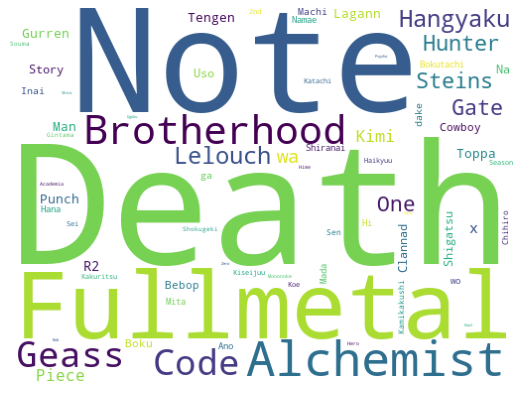

In [19]:
plt.subplots(figsize=(14,7))
wordcloud = WordCloud(    collocations=False,
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(list_popularity_and_rank_100))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Gender & Age Deep Dive by Genre

In [23]:
anime_genre = anime.genre
anime_genre.head()

0      Comedy, Supernatural, Romance, Shounen
1    Comedy, Parody, Romance, School, Shounen
2               Comedy, Magic, School, Shoujo
3      Comedy, Drama, Magic, Romance, Fantasy
4             Comedy, Drama, Romance, Shounen
Name: genre, dtype: object

In [24]:
genre_list = []

genre_splited = []

for i in anime_genre.index:
    for j in anime_genre[i].split(", "):
        genre_splited.append(j)
        if j not in genre_list:
            genre_list.append(j)   

In [25]:
genre_splited[0:6]

['Comedy', 'Supernatural', 'Romance', 'Shounen', 'Comedy', 'Parody']

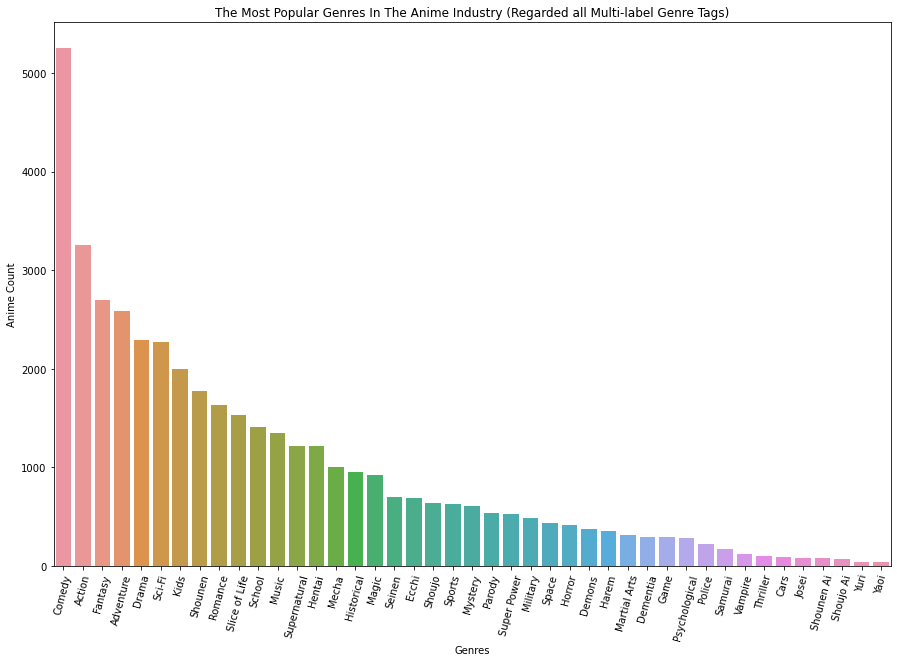

In [26]:
anime_genres_count = pd.Series(genre_splited).value_counts() 

plt.figure(figsize=(15,10))
sns.barplot(x=anime_genres_count.index.tolist(), y=anime_genres_count.tolist())
plt.xlabel('Genres')
plt.ylabel('Anime Count')
plt.title('The Most Popular Genres In The Anime Industry (Regarded all Multi-label Genre Tags)') 
plt.xticks(rotation= 75) 
plt.show()


In [57]:
genre_one_label = []

for i in anime_genre.index:
    if len(anime_genre[i].split(", ")) == 1:
        genre_one_label.append(anime_genre[i])     

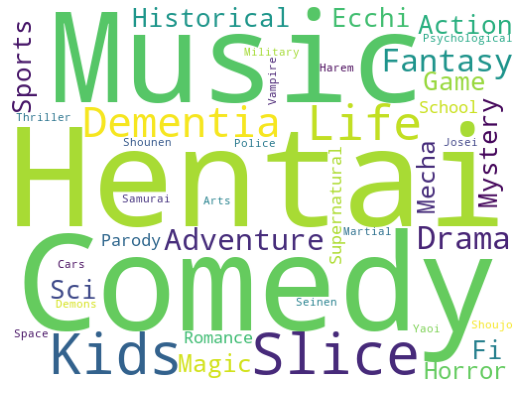

In [58]:
anime_genres_one_label_count = pd.Series(genre_one_label).value_counts()  

plt.subplots(figsize=(14,7))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(anime_genres_one_label_count.index.tolist()))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
# 43 genre
F = [0]*43
M =   [0]*43

genre_df = pd.DataFrame({'genre': genre_list, 'Female': F, 'Male': M})
genre_df.set_index('genre', inplace=True)

for i in animelists_merge.index:
    for j in animelists_merge.genre[i].split(", "):
        genre_df[animelists_merge.gender[i]][j] +=1 

In [29]:
genre_df.head()

,Female,Male
genre,,
Comedy,11204,38868
Supernatural,5183,16980
Romance,6659,20983
Shounen,5737,20616
Parody,833,3110


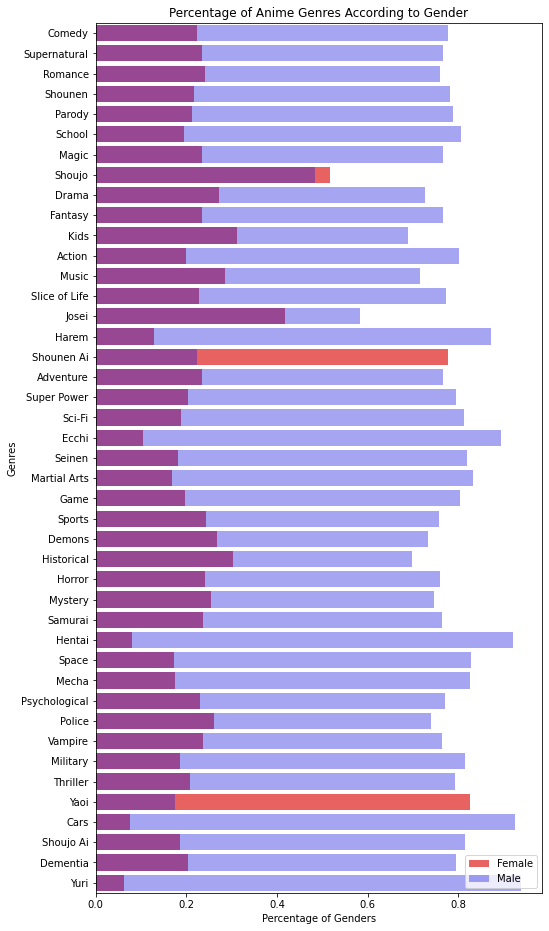

In [30]:
#genre
Female = []
Male = []

for i in genre_list:
    Female.append(genre_df.loc[i,'Female']/sum(genre_df.loc[i,:]))
    Male.append(genre_df.loc[i,'Male']/sum(genre_df.loc[i,:]))  

f,ax = plt.subplots(figsize=(8,16))
sns.barplot(x=Female, y=genre_list, label='Female', color='r', alpha = 0.7)
sns.barplot(x=Male, y=genre_list, label='Male', color='b', alpha = 0.4)

ax.set(xlabel='Percentage of Genders', ylabel='Genres', title='Percentage of Anime Genres According to Gender')
ax.legend(loc='lower right',frameon= True)
plt.show()

In [31]:
users['birth_date'] = pd.to_datetime(users['birth_date'], errors = 'coerce')
users=users[users.birth_date.notnull()]

birth_date = users.birth_date
gender = users.gender
spent = users.user_days_spent_watching
 
age = []
for each in birth_date:
    age.append(round((datetime.datetime.now()-each).days/365.25,1))

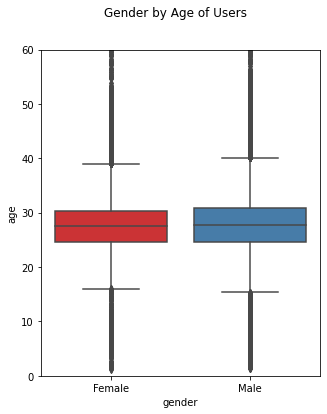

In [61]:
age_dict = {'gender':gender,'age':age,'spent':spent}
users_age_spent = pd.DataFrame(age_dict,columns=['gender','age','spent'])

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5, 6))
sns.boxplot(x="gender", y="age", data=users_age_spent, palette="Set1", ax=ax)
ax.set_ylim([0, 60])
plt.suptitle('Gender by Age of Users')
plt.show()

In [33]:
age.sort()
age[0:5]

#in the first step i dropped outliers

users_age_spent.drop(users_age_spent[users_age_spent.spent>1000].index, inplace=True)
users_age_spent.drop(users_age_spent[users_age_spent.age>80].index, inplace=True)

In [34]:
users_age_spent.head()

,gender,age,spent
0,Female,30.9,55.31
1,Female,26.2,118.07
2,Male,29.7,83.70
3,Male,30.3,167.16
4,Female,22.6,15.20


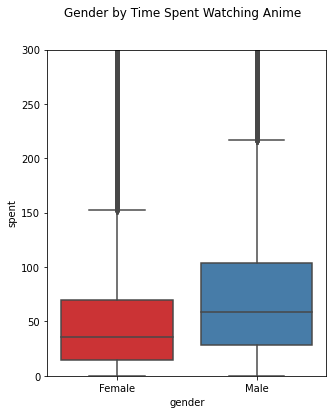

In [60]:
#Time users spent watching anime by gender
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5, 6))
sns.boxplot(x="gender", y="spent", data=users_age_spent, palette="Set1", ax=ax)
ax.set_ylim([0, 300])
plt.suptitle('Gender by Time Spent Watching Anime')
plt.show()

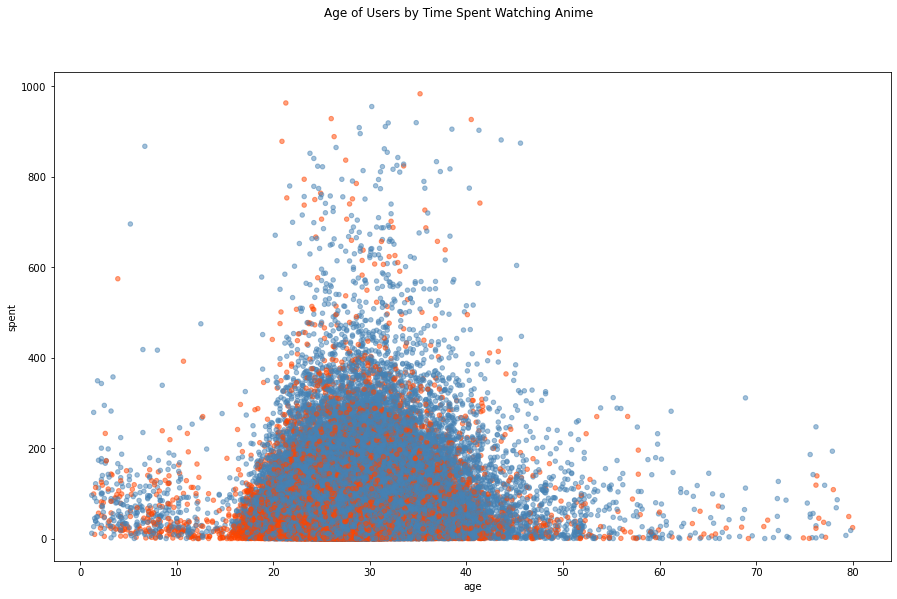

In [59]:
# Time spent watching anime by age
users_age_spent.plot(kind='scatter', x='age', y='spent', alpha=0.5, figsize = (15,9),
                     color=["orangered" if each =="Female" else "steelblue" for each in users_age_spent.gender])
plt.suptitle('Age of Users by Time Spent Watching Anime')
plt.show()

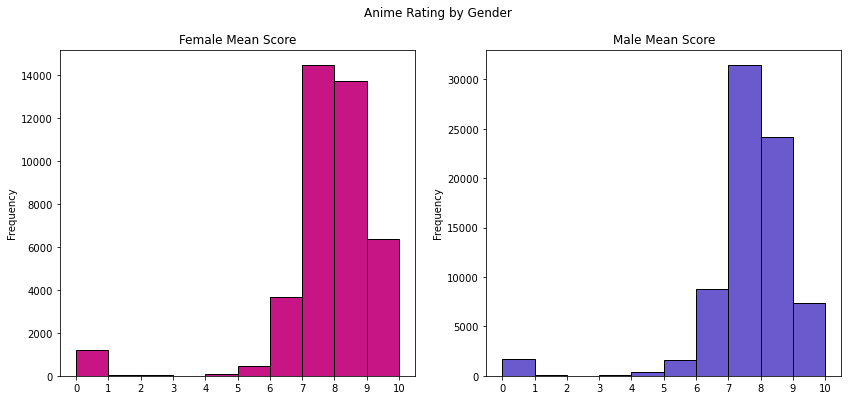

In [38]:
F_stats = users_df[(users_df["gender"]=='Female') & (users_df["stats_episodes"]>=0)].loc[:,["stats_rewatched","stats_mean_score"]]     
M_stats = users_df[(users_df["gender"]=='Male') & (users_df["stats_episodes"]>=0)].loc[:,["stats_rewatched","stats_mean_score"]]    

f,ax=plt.subplots(1,2,figsize=(14,6))
F_stats.stats_mean_score.plot.hist(ax=ax[0],bins=10,edgecolor='black',color='mediumvioletred')
ax[0].set_title('Female Mean Score')
x1=list(range(0,11,1))
ax[0].set_xticks(x1)
M_stats.stats_mean_score.plot.hist(ax=ax[1],bins=10,edgecolor='black',color='slateblue')
ax[1].set_title('Male Mean Score')
x2=list(range(0,11,1))
ax[1].set_xticks(x2)
plt.suptitle('Anime Rating by Gender')
plt.show()